# TASK 1: Data preparation and customer analytics

In [1]:
#import package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Observe first 5 row of the dataset
transac = pd.read_excel('QVI_transaction_data.xlsx')
purchase = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
print(purchase.isnull().sum())
print(transac.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [4]:
for col in purchase.columns:
    print(purchase[col].value_counts())
#Seems good to merge

2047      1
197109    1
121326    1
119279    1
74225     1
         ..
251088    1
77007     1
81101     1
79052     1
131072    1
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64
Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


In [5]:
data = transac.merge(purchase, on='LYLTY_CARD_NBR', how='inner')
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [6]:
data.DATE.value_counts()

43458    939
43457    917
43456    915
43453    906
43452    862
        ... 
43446    664
43640    662
43629    659
43391    658
43429    648
Name: DATE, Length: 364, dtype: int64

In [7]:
#Check for data type for each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [8]:
#The DATE column is a bit more complex
data.DATE = data.DATE.apply(lambda x: datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x - 2))

In [9]:
#Check the result to see if we are correct
data.DATE
#YEAH! it is done.
data.DATE = data.DATE.astype('datetime64')

In [10]:
data.DATE.value_counts()

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: DATE, Length: 364, dtype: int64

<b>Implication:</b>

We can see that <u>DATE, STORE_NBR,LYLTY_CARD_NBR and TXN_ID</u> data type need to be changed

## Creating and interpreting high level summaries of the data

In [11]:
data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Note:
1. TOT_SALES, PROD_QTY shows a hugh jump from 75% quantile to max. A sign for outliers!
2. STORE_NBR,LYLTY_CARD_NBR,TXN_ID should be treated as strings. Need to change data type later!
3. DATE is in wrong data type. Need to deal with it later.


In [12]:
#Null values
data.isnull().sum()
#There is no missing value in the dataset. Awesome!

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### EDA
Total Sales and PROD_QTY are the the only two numeric column that we need to dig down and understand. We will implement sns.displot/sns.distplot to see the univariate distribution of these two features.

All the observations are concentrated on the left side (much less than 25). We can confirm that PRO_QTY has a outlier of 200, <u>we will drop this data point later</u>.

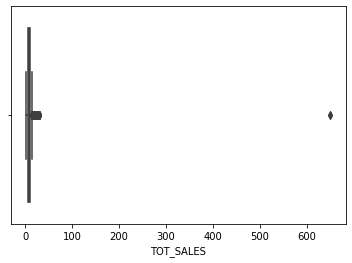

In [13]:
#TOT_SALES boxplot
sns.boxplot(data.TOT_SALES)

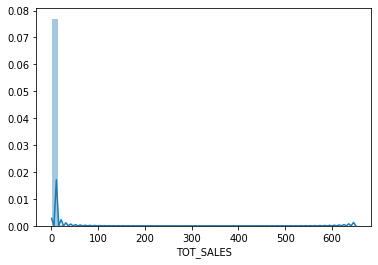

In [14]:
#TOT_SALES histogram
sns.distplot(data.TOT_SALES, kde=True)

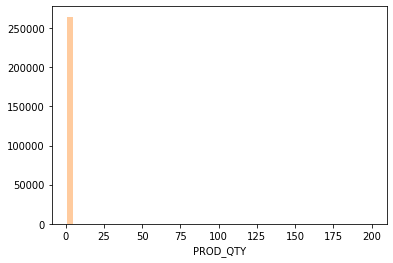

In [15]:
try:
    sns.distplot(data.PROD_QTY)
except RuntimeError:
    sns.distplot(data.PROD_QTY,kde=False)
#Eventhough there is obviously outliers, but I woudld consider there may be information in the outlier. 
#Hence, not dropping outlier in this features.

### Drop outlier
The threshold for droping outlier is chosen to be 3 standard deviations from mean

In [16]:
#Thresholds
sales = data.TOT_SALES.mean()+ 3*data.TOT_SALES.std()
print('We only keep value that is less than {} for TOT_SALE'.format(sales,))


We only keep value that is less than 16.55387681881116 for TOT_SALE


In [17]:
#Dropping outlier based on the thresholds
mask = data.TOT_SALES[data.TOT_SALES < 16.553876818811084].index
data = data.iloc[mask,:]

Double check the two columns

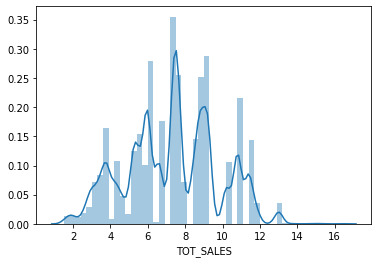

In [18]:
#TOT_SALES
sns.distplot(data.TOT_SALES,kde=True)

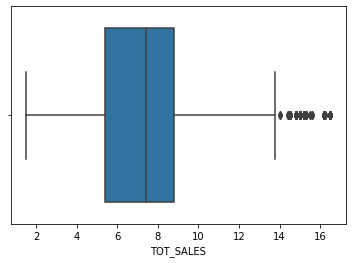

In [19]:
sns.boxplot(data.TOT_SALES)

Distplot and boxplot seems great, the outliers are properly dealt with. Next we drop the rows with outlier in the dataset

## Checking format of the columns

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264397 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264397 non-null  datetime64[ns]
 1   STORE_NBR         264397 non-null  int64         
 2   LYLTY_CARD_NBR    264397 non-null  int64         
 3   TXN_ID            264397 non-null  int64         
 4   PROD_NBR          264397 non-null  int64         
 5   PROD_NAME         264397 non-null  object        
 6   PROD_QTY          264397 non-null  int64         
 7   TOT_SALES         264397 non-null  float64       
 8   LIFESTAGE         264397 non-null  object        
 9   PREMIUM_CUSTOMER  264397 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


Things to do:
1. Change DATE from int64 to datetime64
2. Change STORE_NBR,LYLTY_CARD_NBR, TXN_ID and PROD_NBR from int64 to string.

In [21]:
for i in ['STORE_NBR','LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR']:
    data[i] = data[i].astype('O')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264397 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264397 non-null  datetime64[ns]
 1   STORE_NBR         264397 non-null  object        
 2   LYLTY_CARD_NBR    264397 non-null  object        
 3   TXN_ID            264397 non-null  object        
 4   PROD_NBR          264397 non-null  object        
 5   PROD_NAME         264397 non-null  object        
 6   PROD_QTY          264397 non-null  int64         
 7   TOT_SALES         264397 non-null  float64       
 8   LIFESTAGE         264397 non-null  object        
 9   PREMIUM_CUSTOMER  264397 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 22.2+ MB


In [23]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


The data is now cleaned! 

### We start the analysis
Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

In [24]:
#Conduct bivariate distribution analysis, i.e. TOT_SALES vs features.
#By screening the features, there are some useful feature to conduct out analysis: 
#dimension to analyze ['date','PROD_NAME','LIFESTAGE','PREMIUM_CUSTOMER']

In [25]:
time_series = data.DATE.value_counts().sort_index(ascending = True)
#we only have 364 unique date, but a year should have 365 day
time_series

2018-07-01    724
2018-07-02    711
2018-07-03    722
2018-07-04    714
2018-07-05    712
             ... 
2019-06-26    723
2019-06-27    709
2019-06-28    730
2019-06-29    745
2019-06-30    744
Name: DATE, Length: 364, dtype: int64

In [26]:
#find out the missing day
missed = pd.date_range(start = data.DATE.min(),end =data.DATE.max()).difference(data.DATE)
missed

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [48]:
#seperate the series in order to visualize the mising day
time_series[:'2018-12-24']

2018-07-01    724
2018-07-02    711
2018-07-03    722
2018-07-04    714
2018-07-05    712
             ... 
2018-12-20    855
2018-12-21    842
2018-12-22    915
2018-12-23    917
2018-12-24    939
Name: DATE, Length: 177, dtype: int64

Text(0, 0.5, 'number of transaction')

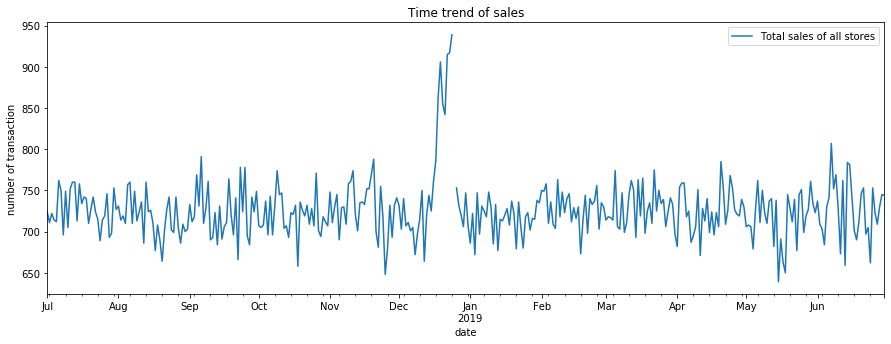

In [59]:
#plot a time serires graph
time_series.sort_index(ascending=True)
plt.figure(figsize = (15,5))
#date before Christmas and after
time_series[:'2018-12-25'].plot(legend = True, c='tab:blue', label='Total sales of all stores')
time_series['2018-12-26':].plot(legend = False, c='tab:blue')

plt.title('Time trend of sales')
plt.xticks()
plt.xlabel('date')
plt.ylabel('number of transaction')
#There is a jump in sales around the end of 2018 and start of 2019, and no sales in 2018 Chrismas

### Findings:  
There is a hugh spike before Christmas.
On average, beginning and the end of a month tend to have higher total sales than mid-month.

### PROD_NAME
PROD_NAME has lots of information in one columns. and they can be extracted using str and re.

In [28]:
data.PROD_NAME

0          Natural Chip        Compny SeaSalt175g
1                        CCs Nacho Cheese    175g
2                  WW Original Stacked Chips 160g
3                               CCs Original 175g
4          Smiths Crinkle Cut  Chips Chicken 170g
                           ...                   
264831    Kettle Sweet Chilli And Sour Cream 175g
264832              Tostitos Splash Of  Lime 175g
264833                   Doritos Mexicana    170g
264834    Doritos Corn Chip Mexican Jalapeno 150g
264835              Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264397, dtype: object

In [29]:
data.PROD_NAME
#There is brand name,actual product and size
#Lets extract brand name
data['BRAND'] = data.PROD_NAME.str.partition()[0]
#also size
data['size'] = data.PROD_NAME.str.extract('(\d+)').astype('int')

In [30]:
data.BRAND.value_counts()

Kettle        41166
Smiths        28818
Pringles      25052
Doritos       24902
Thins         14075
RRD           11894
Infuzions     11044
WW            10320
Cobs           9678
Tostitos       9443
Twisties       9420
Old            9296
Tyrrells       6428
Grain          6265
Natural        6050
Red            5885
Cheezels       4583
CCs            4551
Woolworths     4437
Dorito         3182
Infzns         3141
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [31]:
#Deal with BRAND name synonyms and appreviations
data['BRAND'].replace('Smith','Smiths',inplace = True)
data['BRAND'].replace(['Red','RRD'],'Red Rock Deli',inplace = True)
data['BRAND'].replace('Infzns','Infuzions',inplace = True)
data['BRAND'].replace('WW','Woolworths',inplace = True)
data['BRAND'].replace('Snbts','Sunbites',inplace = True)
data['BRAND'].replace(['GrnWves','Grain'],'Grain Waves',inplace = True)
data['BRAND'].replace('NCC','Natural',inplace = True)
data['BRAND'].replace('Dorito','Doritos',inplace = True)

In [32]:
data.BRAND.value_counts()

Kettle           41166
Smiths           31781
Doritos          28084
Pringles         25052
Red Rock Deli    17779
Woolworths       14757
Infuzions        14185
Thins            14075
Cobs              9678
Tostitos          9443
Twisties          9420
Old               9296
Grain Waves       7733
Natural           7469
Tyrrells          6428
Cheezels          4583
CCs               4551
Sunbites          3008
Cheetos           2927
Burger            1564
French            1418
Name: BRAND, dtype: int64

In [33]:
#See which brand contribute the most sales
data.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = False)

BRAND
Kettle           387471.2
Doritos          239360.3
Smiths           223704.1
Pringles         176730.5
Infuzions         98743.6
Red Rock Deli     95046.0
Old               90142.5
Thins             88852.5
Twisties          80828.4
Tostitos          79239.6
Cobs              70284.8
Grain Waves       51491.2
Tyrrells          51387.0
Woolworths        49343.6
Natural           42318.0
Cheezels          39591.0
CCs               18078.9
Cheetos           16884.5
Sunbites           9676.4
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

### LIFESTAGE & PREMIUM CUSTOMER

In [34]:
data.LIFESTAGE.value_counts()
#There are 7 types of lifestage.

OLDER SINGLES/COUPLES     54380
RETIREES                  49687
OLDER FAMILIES            48497
YOUNG FAMILIES            43516
YOUNG SINGLES/COUPLES     36335
MIDAGE SINGLES/COUPLES    25069
NEW FAMILIES               6913
Name: LIFESTAGE, dtype: int64

In [35]:
#Which lifestage consume the most?
stage = data.groupby('LIFESTAGE').TOT_SALES.sum().sort_values(ascending = False)
stage

LIFESTAGE
OLDER SINGLES/COUPLES     400324.45
RETIREES                  364868.00
OLDER FAMILIES            350423.80
YOUNG FAMILIES            314595.30
YOUNG SINGLES/COUPLES     259558.20
MIDAGE SINGLES/COUPLES    183863.50
NEW FAMILIES               50300.85
Name: TOT_SALES, dtype: float64

Text(0.5, 1.0, 'Lifestage sales break down')

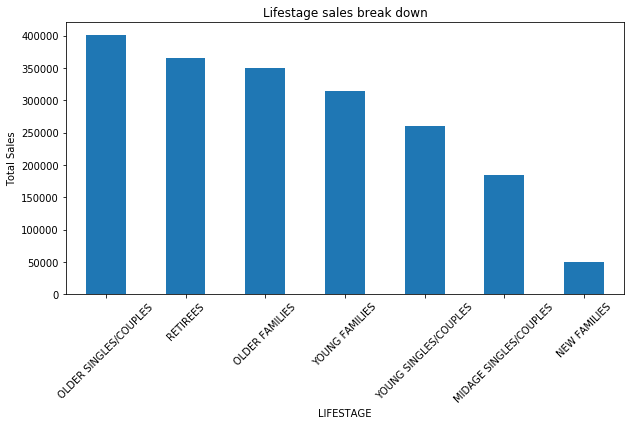

In [36]:
stage.plot(figsize=(10,5),kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.title('Lifestage sales break down')

Sales
LIFESTAGE
OLDER SINGLES/COUPLES     400324.45
RETIREES                  364868.00
OLDER FAMILIES            350423.80
YOUNG FAMILIES            314595.30
YOUNG SINGLES/COUPLES     259558.20
MIDAGE SINGLES/COUPLES    183863.50
NEW FAMILIES               50300.85
Name: TOT_SALES, dtype: float64 

Customer number
LIFESTAGE
RETIREES                  14802
OLDER SINGLES/COUPLES     14601
YOUNG SINGLES/COUPLES     14428
OLDER FAMILIES             9773
YOUNG FAMILIES             9175
MIDAGE SINGLES/COUPLES     7273
NEW FAMILIES               2549
Name: LYLTY_CARD_NBR, dtype: int64


Text(0.5, 1.0, 'Lifestage customer count break down')

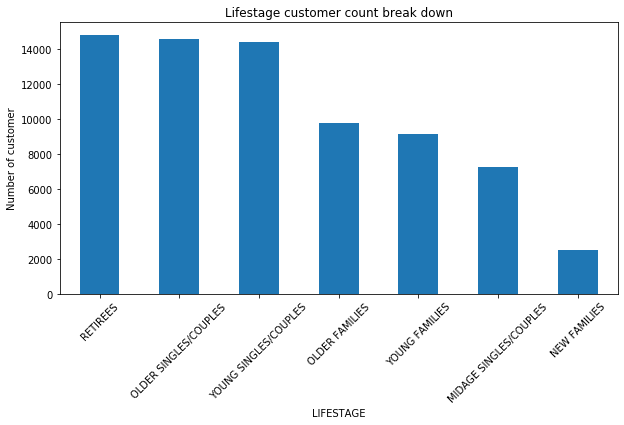

In [37]:
stage_num = data.groupby('LIFESTAGE').LYLTY_CARD_NBR.nunique().sort_values(ascending = False)
print('Sales')
print(stage,'\n')
print('Customer number')
print(stage_num)
stage_num.plot(figsize=(10,5),kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Number of customer')
plt.title('Lifestage customer count break down')
#customer number in each lifestage in quite consistant to their total sales
#Except YOUNG SINGLE/COUPLEs, it has 2nd largest number of customer, but comes at the second last in total sales.
#It could be due to lifestyle for young singles/couples. Healthy diet, go to gym, dating (need good body shapes)

In [38]:
#PREMIUM_CUSTOMER
data.PREMIUM_CUSTOMER.value_counts()
#There are three types of customer categories.

Mainstream    101824
Budget         92994
Premium        69579
Name: PREMIUM_CUSTOMER, dtype: int64

In [39]:
premium = data.groupby('PREMIUM_CUSTOMER').TOT_SALES.sum()
premium

PREMIUM_CUSTOMER
Budget        672784.05
Mainstream    747321.70
Premium       503828.35
Name: TOT_SALES, dtype: float64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

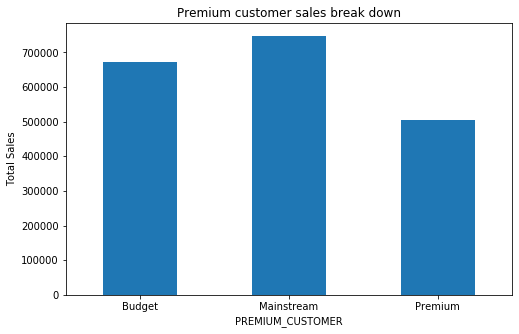

In [40]:
premium.plot(kind='bar',figsize=(8,5))
plt.ylabel('Total Sales')
plt.title('Premium customer sales break down')
plt.xticks(rotation=0)

In [41]:
cross_sales = data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).TOT_SALES.sum().sort_values(ascending = False)
cross_sales = pd.DataFrame(cross_sales)
cross_sales = cross_sales.rename(columns = {'TOT_SALES':'Total Sales'})
cross_sales

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            167352.95
Mainstream       YOUNG SINGLES/COUPLES     156975.00
                 RETIREES                  155143.55
Budget           YOUNG FAMILIES            138650.05
                 OLDER SINGLES/COUPLES     136004.30
Mainstream       OLDER SINGLES/COUPLES     132714.10
Premium          OLDER SINGLES/COUPLES     131606.05
Budget           RETIREES                  112527.30
Mainstream       OLDER FAMILIES            102838.35
Premium          RETIREES                   97197.15
Mainstream       YOUNG FAMILIES             92374.85
                 MIDAGE SINGLES/COUPLES     90303.95
Premium          YOUNG FAMILIES             83570.40
                 OLDER FAMILIES             80232.50
Budget           YOUNG SINGLES/COUPLES      60999.60
Premium          MIDAGE SINGLES/COUPLES     58188.15
                 YOUNG SINGLES/COUPLES      41583.60
Budget           MIDAGE SINGLES/COUPLES     35371.40
                 NEW FAMILIES               21878.45
Mainstream       NEW FAMILIES               16971.90
Premium          NEW FAMILIES               11450.50

In [42]:
cross_num = data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).LYLTY_CARD_NBR.nunique().sort_values(ascending = False)
cross_num = pd.DataFrame(cross_num)
cross_num = cross_num.rename(columns = {'LYLTY_CARD_NBR':'Number of Customer'})
cross_num

Number of Customer
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 8078
                 RETIREES                              6479
Budget           OLDER SINGLES/COUPLES                 4926
Mainstream       OLDER SINGLES/COUPLES                 4925
Premium          OLDER SINGLES/COUPLES                 4750
Budget           OLDER FAMILIES                        4670
                 RETIREES                              4452
                 YOUNG FAMILIES                        4016
Premium          RETIREES                              3871
Budget           YOUNG SINGLES/COUPLES                 3777
Mainstream       MIDAGE SINGLES/COUPLES                3338
                 OLDER FAMILIES                        2831
                 YOUNG FAMILIES                        2727
Premium          YOUNG SINGLES/COUPLES                 2573
                 YOUNG FAMILIES                        2432
                 MIDAGE SINGLES/COUPLES                2431
                 OLDER FAMILIES                        2272
Budget           MIDAGE SINGLES/COUPLES                1504
                 NEW FAMILIES                          1112
Mainstream       NEW FAMILIES                           849
Premium          NEW FAMILIES                           588

Text(0.5, 1.0, 'Total Sale by segments')

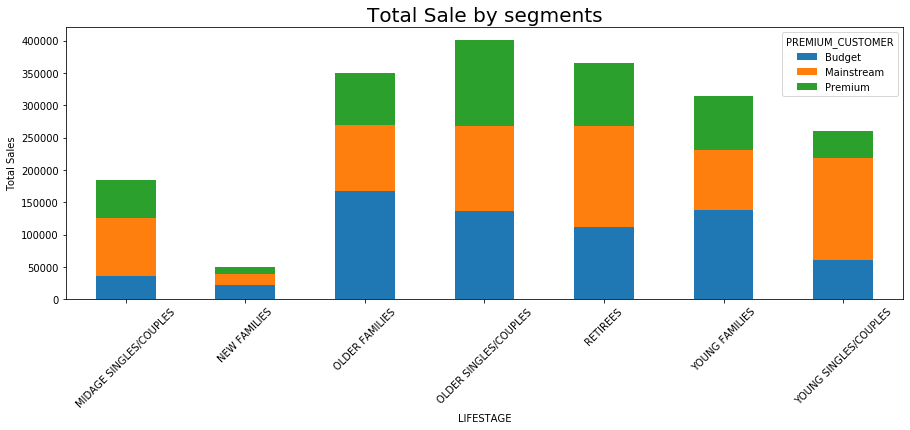

In [43]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum().unstack().plot(kind='bar',stacked = True,
                                                                              figsize=(15,5) )
plt.xticks(rotation = 45)
plt.ylabel('Total Sales')
plt.title('Total Sale by segments',size=20)

Text(0.5, 1.0, 'Customer number by segments')

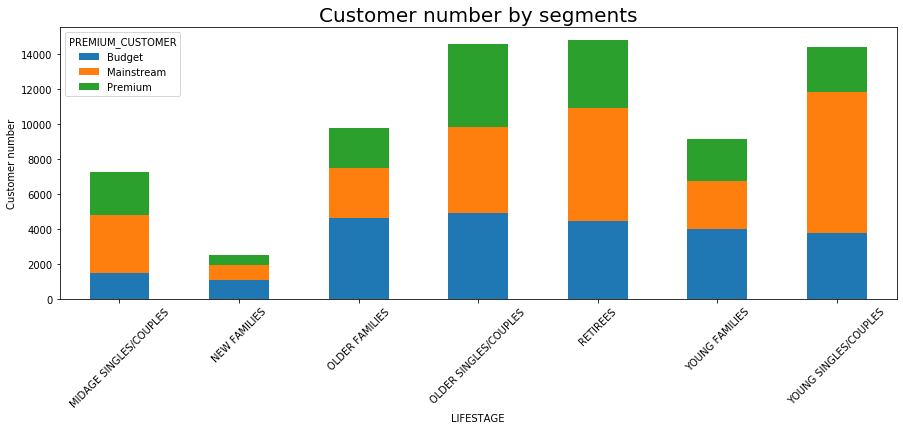

In [44]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique().unstack().plot(kind='bar',stacked = True,
                                                                              figsize=(15,5))
plt.xticks(rotation = 45)
plt.ylabel('Customer number')
plt.title('Customer number by segments',size=20)

#### Findings
1. OLDER SINGLE/COUPLES, YOUNG SINGLE/COUPLES,RETIRES, OLD FAMILY and YONG FAMILY contribute the most sales
2. New family does not have much number customer and total sale.
3. OLDER FAMLY comes in 4th place in number but contribute the 3rd most total sales

Total Sales = Price x Quantity
We need to know this is driven by customer buying high price or large quantity. In order to reveal this, we use metrics: 
- PROD_QTY/customer number to know the quantity purchaseed.
- TOT_SALES/PROD_QTY to know the price per unit.

                                                0
LIFESTAGE              PREMIUM_CUSTOMER          
OLDER FAMILIES         Mainstream        9.758036
                       Budget            9.604497
                       Premium           9.539613
YOUNG FAMILIES         Budget            9.203934
                       Premium           9.168586
                       Mainstream        9.151082
OLDER SINGLES/COUPLES  Premium           7.126316
                       Budget            7.117337
                       Mainstream        7.077563
MIDAGE SINGLES/COUPLES Mainstream        6.768125
RETIREES               Budget            6.430818
                       Premium           6.404288
MIDAGE SINGLES/COUPLES Premium           6.365282
                       Budget            6.292553
RETIREES               Mainstream        6.235839
NEW FAMILIES           Mainstream        5.075383
                       Premium           5.013605
                       Budget            5.000899


Text(0.5, 1.0, 'Average purchase by segments')

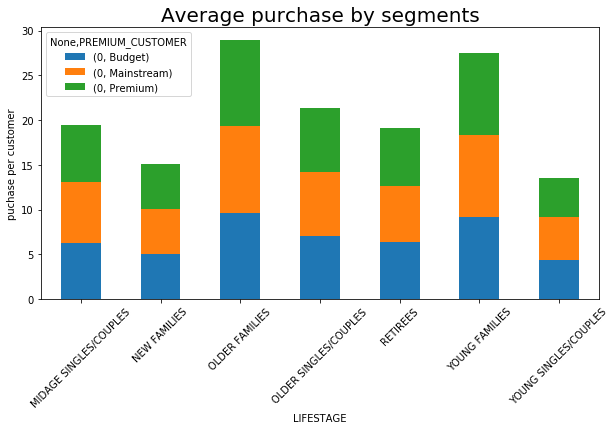

In [45]:
#Quantity purchaseed
avg_qty = (data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum() / data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique()).sort_values(ascending = False)
avg_qty = pd.DataFrame(avg_qty)
print(avg_qty)
avg_qty.unstack().plot(kind='bar',stacked = True, figsize=(10,5))
plt.xticks(rotation = 45)
plt.ylabel('puchase per customer')
plt.title('Average purchase by segments',size=20)

#### Findings:
1. OLDER FAMILIES and YOUNG FAMILIES tent to make more purchase. Because they need to buy for their kids/family members.

                                                0
LIFESTAGE              PREMIUM_CUSTOMER          
YOUNG SINGLES/COUPLES  Mainstream        4.077802
MIDAGE SINGLES/COUPLES Mainstream        3.997165
NEW FAMILIES           Mainstream        3.938710
                       Budget            3.934265
RETIREES               Budget            3.930398
                       Premium           3.920663
OLDER SINGLES/COUPLES  Premium           3.887919
NEW FAMILIES           Premium           3.884159
OLDER SINGLES/COUPLES  Budget            3.879187
RETIREES               Mainstream        3.839997
OLDER SINGLES/COUPLES  Mainstream        3.807387
MIDAGE SINGLES/COUPLES Premium           3.760382
YOUNG FAMILIES         Budget            3.751050
                       Premium           3.747888
MIDAGE SINGLES/COUPLES Budget            3.737468
OLDER FAMILIES         Budget            3.731143
                       Mainstream        3.722655
                       Premium           3.701786


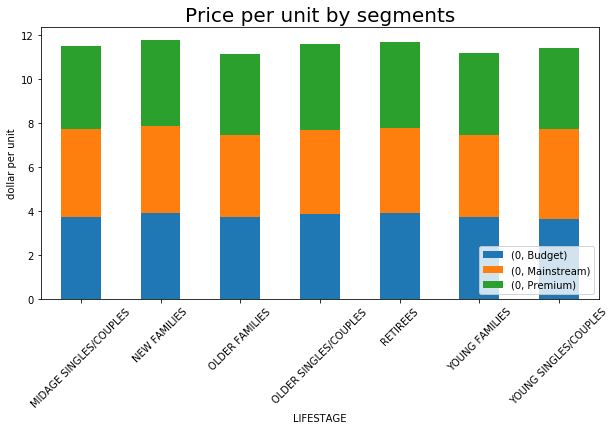

In [46]:
#Price per unit
avg_price = (data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum() / data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum()).sort_values(ascending = False)
avg_price = pd.DataFrame(avg_price)
print(avg_price) 
avg_price.unstack().plot(kind='bar',stacked = True, figsize=(10,5))
plt.xticks(rotation = 45)
plt.ylabel('dollar per unit')
plt.title('Price per unit by segments',size=20)
plt.legend(loc = 'lower right')

#### Findings:
  We can see that there is not much difference in price per unit. Hence, we could conclude that the higher total sales is due to <b>high quantity</b> purchase for each segments.

## Pack size

size
175    483294.4
150    303016.0
134    176730.5
110    162176.4
170    146052.6
330    135483.3
300    112688.0
165    101100.2
380     74939.9
270     54942.4
210     42922.8
135     25972.8
250     25886.0
200     16007.5
190     14412.9
160     10647.6
90       9676.4
180      8568.4
70       6852.0
220      6831.0
125      5733.0
Name: TOT_SALES, dtype: float64


Text(0.5, 1.0, 'Total sales by pack size')

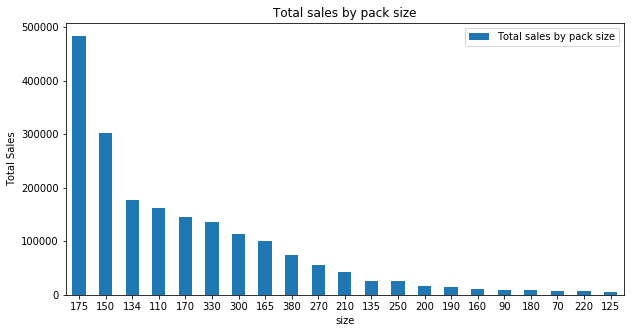

In [76]:
#What is the most popular pack size?
size = data.groupby('size').TOT_SALES.sum().sort_values(ascending=False)
print(size)
size.plot(kind='bar',figsize=(10,5),legend=True,label='Total sales by pack size')
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.title('Total sales by pack size')

The best selling is the 175g package!

In [77]:
pack_life = data.groupby(['LIFESTAGE','size']).TOT_SALES.sum().sort_values(ascending=False)
pack_life

LIFESTAGE              size
OLDER SINGLES/COUPLES  175     100382.1
RETIREES               175      91677.0
OLDER FAMILIES         175      88125.1
YOUNG FAMILIES         175      79953.4
YOUNG SINGLES/COUPLES  175      63892.9
                                 ...   
NEW FAMILIES           125        205.8
                       90         176.8
                       180        167.4
                       220        161.0
                       70         127.2
Name: TOT_SALES, Length: 147, dtype: float64

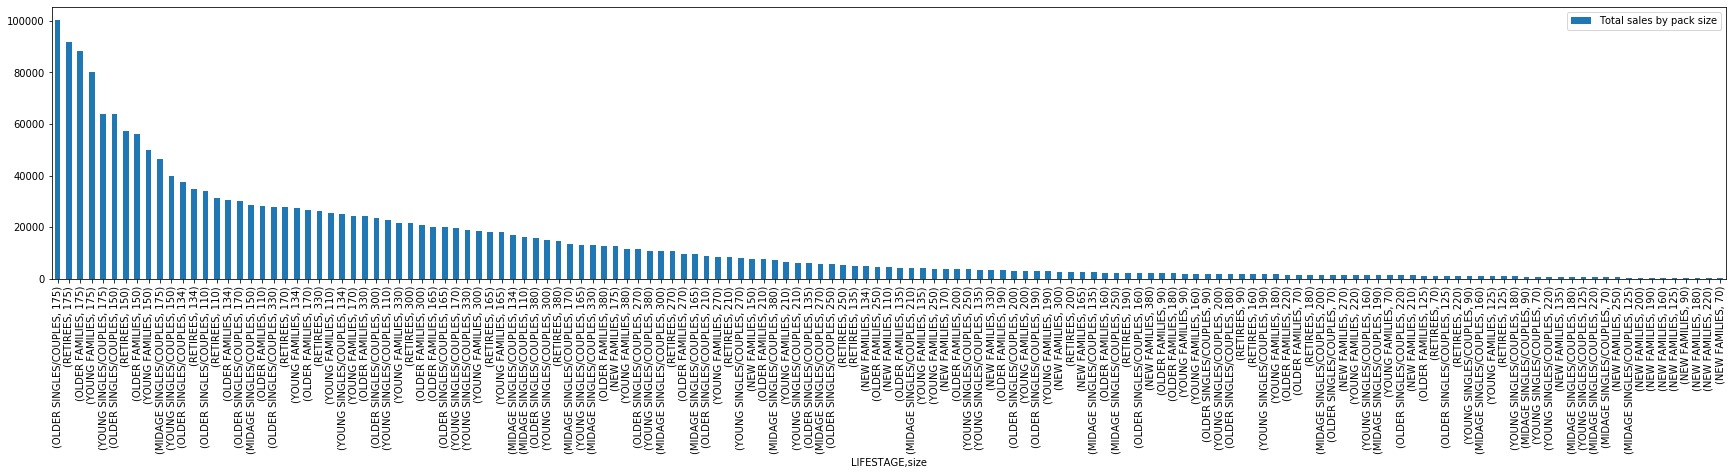

In [80]:
pack_life.plot(kind='bar',figsize=(30,5),legend=True,label='Total sales by pack size')

### Findings:
The best selling pack size for every Lifestage customers is also 175g.